## Understanding NLP Vectorization: Can it predict the relationships in the great epic of Ramayana?

Anyone who's tried their hand at making a computer "understand" text, sounds and visuals will tell you how magnificent our brain is! Natural language processing (NLP) is one area which aims to uncover meanings from a human language. It can be from the written word, or spoken language. While at the core the algorithms map variations in the input data structures, written or spoken, to a retrievable index as they learn, the approach taken in the preceding steps is quite different for spoken and written language. In addition, voice data is richer in terms of what it can convey, including mood of the speaker, accent, gender, age bracket, regional influences, stress levels, and possibly even their health condition (ref. https://www.technologyreview.com/s/603200/voice-analysis-tech-could-diagnose-disease/). 

In both cases, however, we are dealing with messy and unstructured data and, by definition, there's a higher possibility of prediction errors. Nevertheless, NLP models can be very useful and can create excellent real-world applications, some which are already in use e.g. a) digital assistants such as Alexa/Echo, Siri, Google Home/voice, b) online translators, and c) for optimizing search engines in ecommerce and for regional needs. 

Processing text documents in NLP form typically require the following steps*:

* tokenization and lower casing - breaking up long strings of text into smaller pieces. Paragraphs to sentences, sentences to phrases, phrases to words etc.

* truncating special charecters and standardizing character sets (e.g. UTF-8)
* contraction expansion 
* eliminating stopwords
* stemming
* lemmatization

(For details refer a quick write up on: https://www.kdnuggets.com/2017/12/general-approach-preprocessing-text-data.html and a more detailed one at: https://www.kdnuggets.com/2018/03/text-data-preprocessing-walkthrough-python.html)

The above steps are necessry before building a vector space using a text corpus. 

One way of analyzing a (large) text matter is to uncover what words of interest are associated with others, and this can be done by building a vector space. A vector space creates an n-dimensional associative map where closely linked words are grouped in a cluster (i.e. the spatial distance between them is shorter). While different methods of building a vector space are available, for this illustration let's use Google's Word2Vec library (a popular alternative is GloVe). 

Higher dimensions in the vector space increase accuracy and predictability, but are computationally very expensive and a humble desktop/laptop can only be expected to do so much. In order to be more efficient, we can try dimensionality reduction using tSNE (used here, and also to help with visualization) or a suitable alternative. We also limit the word count and keywords so that we can get an output within a reasonable time. However, we should note that this will have an impact on the accuracy. 

#### A irresponsibly brief background on Ramayana

The great epic of Ramayana is an Indian poem originally narrated by sage Valmiki. Ramayana predates Mahabharata, the other great Indian epic, and the "original" version is believed to have been written around 2000 years ago (the oral version is believed to be 500 years older). The epic describes the story of Lord Rama, an avatar of God Vishnu, and his life as the ruler of kingdom Kosala.

The epic follows the life and duties of Lord Rama as a son of Dasharatha; a prince; husband to Sita; his brothers Lakshmana, Bharatha and Shatrughna; and his rival Ravana, the demon king of Lanka. 

Note: the algorithmic processing of natural language is always tricky. With pyschological and linguistic studies revealing that most of the meaning is conveyed through non-verbal attributes such as the tone of voice, body language, facial expressions and, perhaps most importantly, the context -capturing these attributes and reducing it to binary processing is extremely complex, not to mention computationally intensive! But even in the face of such odds, the NLP can help us understand a few things quickly, or at least point us in the directions that we need to look or highlight attributes to which we need to pay attention. 

Even with our brain, with  its extraordinary computational powers, it's easier to glean meanings from prose than poetry. The version of Ramayana used here is closer to its poem structure derived from over 24,000 verses, and this would impact the results. To add to complexity, the same characters are referred to by different names, for instance, Lord Rama also goes by 'Ramachandra', 'Ram', 'Shri Rama', Sita goes by 'Sitae', 'Sitamaa', and Bali goes by 'Vali' etc. These complexities are without accounting for errors in typo. Let's try a simple vectorization exercise on a very complex subject matter. 

#### Import the commonly used libraries
(Note: depending on the version/IDE of python you are using not all the libraries may be required, but it doesn't hurt to import here in our example.)

In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
#import the typical libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os #for making changes to the file system in order save and retrive files
import pprint #let's use pretty print
import re

In [3]:
# import libraries for enabling NLP

import codecs
import glob
import logging
import multiprocessing
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
%pylab inline

D:\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


Populating the interactive namespace from numpy and matplotlib


In [4]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [5]:
#remove the comment and install these nltk libraries if not installed

#nltk.download("punkt")
#nltk.download("stopwords")

In [6]:
book_filenames = sorted(glob.glob("data/*.txt"))

For this example I used a simple text version of the Ramayana, transliterated by Hari Prasad Shastri and it was accessed from: https://archive.org/stream/The.Ramayana.of.Valmiki.by.Hari.Prasad.Shastri/The.Ramayana.of.Valmiki.by.Hari.Prasad.Shastri_djvu.txt

In [7]:
print("Found books:")
book_filenames

Found books:


['data\\Ramayana_by_HP_Shastri.txt']

In [8]:
corpus_raw = u""
for book_filename in book_filenames:
    print("Reading '{0}'...".format(book_filename))
    with codecs.open(book_filename, "r", "utf-8") as book_file:
        corpus_raw += book_file.read()
    print("Corpus is now {0} characters long".format(len(corpus_raw)))
    print()

Reading 'data\Ramayana_by_HP_Shastri.txt'...
Corpus is now 3591119 characters long



In [9]:
#note that since it is a flat text file, the size of corpus will be close to the size on disk

In [10]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [11]:
raw_sentences = tokenizer.tokenize(corpus_raw)

In [12]:
#remove unnnecessary characters, punctuations, split into words, eliminate hyphens
#create a list of words

def sentence_to_wordlist(raw):
    clean = re.sub("[^a-zA-Z]"," ", raw)
    words = clean.split()
    return words

In [13]:
#build a sentence where each word is tokenized
sentences = []
for raw_sentence in raw_sentences:
    if len(raw_sentence) > 0:
        sentences.append(sentence_to_wordlist(raw_sentence))

In [14]:
print(raw_sentences[5])
print(sentence_to_wordlist(raw_sentences[5]))

The deeds of Rama that will be described in the sacred 
poem - - - - - I2 
4.
['The', 'deeds', 'of', 'Rama', 'that', 'will', 'be', 'described', 'in', 'the', 'sacred', 'poem', 'I']


In [15]:
token_count = sum([len(sentence) for sentence in sentences])
print("The book corpus contains {0:,} tokens".format(token_count))

The book corpus contains 588,392 tokens


In [16]:
# we have a corpus that we can vectorize and build a model
# vectors will tell us about associations based on similarity, distance, and rank them as per rules


# Dimensionality of the resulting word vectors.
#more dimensions, more computationally expensive to train but also more accurate
#more dimensions = also more generalized, more transferable for a similar inputs
num_features = 300
# Minimum word count threshold.
min_word_count = 3

# number of threads to run in parallel
# note: not all OS+cpu+driver combinations support multiprocessing in a python env, be careful as to usuage
num_workers = multiprocessing.cpu_count()

# context window length
context_size = 7

# Downsample setting for frequent words.
#0 - 1e-6 should be good for this, but let's try
downsampling = 1e-3

# seed for the random number generator, to make the results reproducible
seed = 25

In [17]:
ramayana2vec = w2v.Word2Vec(
    sg=1,
    seed=seed,
    workers=num_workers,
    size=num_features,
    min_count=min_word_count,
    window=context_size,
    sample=downsampling
)

In [18]:
ramayana2vec.build_vocab(sentences)

2018-06-13 11:12:25,906 : INFO : collecting all words and their counts
2018-06-13 11:12:25,932 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-06-13 11:12:26,029 : INFO : PROGRESS: at sentence #10000, processed 203925 words, keeping 13922 word types
2018-06-13 11:12:26,088 : INFO : PROGRESS: at sentence #20000, processed 429030 words, keeping 20651 word types
2018-06-13 11:12:26,189 : INFO : collected 24778 word types from a corpus of 588392 raw words and 28974 sentences
2018-06-13 11:12:26,196 : INFO : Loading a fresh vocabulary
2018-06-13 11:12:26,253 : INFO : min_count=3 retains 10248 unique words (41% of original 24778, drops 14530)
2018-06-13 11:12:26,253 : INFO : min_count=3 leaves 570201 word corpus (96% of original 588392, drops 18191)
2018-06-13 11:12:26,329 : INFO : deleting the raw counts dictionary of 24778 items
2018-06-13 11:12:26,340 : INFO : sample=0.001 downsamples 44 most-common words
2018-06-13 11:12:26,340 : INFO : downsampling leaves

In [19]:
print("Word2Vec vocabulary length:", len(ramayana2vec.wv.vocab))

Word2Vec vocabulary length: 10248


In the interest of computational efficiency, let's just set the number of epochs at 25.

In [28]:
%%time
ramayana2vec.train(sentences, total_examples=1000, epochs=25)

2018-06-13 11:13:45,355 : WARNING : Effective 'alpha' higher than previous training cycles
2018-06-13 11:13:45,376 : INFO : training model with 4 workers on 10248 vocabulary and 300 features, using sg=1 hs=0 sample=0.001 negative=5 window=7
2018-06-13 11:13:46,477 : INFO : EPOCH 1 - PROGRESS: at 1022.60% examples, 142816 words/s, in_qsize 7, out_qsize 0
2018-06-13 11:13:47,481 : INFO : EPOCH 1 - PROGRESS: at 1967.70% examples, 148229 words/s, in_qsize 7, out_qsize 0
2018-06-13 11:13:48,119 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-06-13 11:13:48,190 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-06-13 11:13:48,211 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-06-13 11:13:48,222 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-06-13 11:13:48,222 : INFO : EPOCH - 1 : training on 588392 raw words (434082 effective words) took 2.8s, 152914 effective words/s
2018-06-13 11:13:48,231 : WARN

2018-06-13 11:14:14,611 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-06-13 11:14:14,634 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-06-13 11:14:14,647 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-06-13 11:14:14,647 : INFO : EPOCH - 10 : training on 588392 raw words (433973 effective words) took 2.7s, 161846 effective words/s
2018-06-13 11:14:14,647 : WARNING : EPOCH - 10 : supplied example count (28974) did not equal expected count (1000)
2018-06-13 11:14:15,720 : INFO : EPOCH 11 - PROGRESS: at 872.00% examples, 122181 words/s, in_qsize 8, out_qsize 0
2018-06-13 11:14:16,754 : INFO : EPOCH 11 - PROGRESS: at 1868.70% examples, 139865 words/s, in_qsize 7, out_qsize 0
2018-06-13 11:14:17,569 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-06-13 11:14:17,587 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-06-13 11:14:17,595 : INFO : worker thread finished; await

2018-06-13 11:14:42,868 : INFO : EPOCH 20 - PROGRESS: at 1022.60% examples, 148290 words/s, in_qsize 7, out_qsize 0
2018-06-13 11:14:43,879 : INFO : EPOCH 20 - PROGRESS: at 2062.20% examples, 161361 words/s, in_qsize 7, out_qsize 0
2018-06-13 11:14:44,397 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-06-13 11:14:44,413 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-06-13 11:14:44,421 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-06-13 11:14:44,474 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-06-13 11:14:44,493 : INFO : EPOCH - 20 : training on 588392 raw words (434015 effective words) took 2.7s, 162582 effective words/s
2018-06-13 11:14:44,501 : WARNING : EPOCH - 20 : supplied example count (28974) did not equal expected count (1000)
2018-06-13 11:14:45,676 : INFO : EPOCH 21 - PROGRESS: at 1022.60% examples, 144867 words/s, in_qsize 7, out_qsize 0
2018-06-13 11:14:46,720 : INFO : EPO

Wall time: 1min 15s


(10846899, 14709800)

In [29]:
#save files for later use

if not os.path.exists("trained"):
    os.makedirs("trained")

In [30]:
ramayana2vec.save(os.path.join("trained", "ramayana2vec.w2v"))

2018-06-13 11:15:01,117 : INFO : saving Word2Vec object under trained\ramayana2vec.w2v, separately None
2018-06-13 11:15:01,152 : INFO : not storing attribute vectors_norm
2018-06-13 11:15:01,176 : INFO : not storing attribute cum_table
2018-06-13 11:15:02,078 : INFO : saved trained\ramayana2vec.w2v


In [31]:
ramayana2vec = w2v.Word2Vec.load(os.path.join("trained", "ramayana2vec.w2v"))

2018-06-13 11:15:02,158 : INFO : loading Word2Vec object from trained\ramayana2vec.w2v
2018-06-13 11:15:02,558 : INFO : loading wv recursively from trained\ramayana2vec.w2v.wv.* with mmap=None
2018-06-13 11:15:02,565 : INFO : setting ignored attribute vectors_norm to None
2018-06-13 11:15:02,578 : INFO : loading vocabulary recursively from trained\ramayana2vec.w2v.vocabulary.* with mmap=None
2018-06-13 11:15:02,585 : INFO : loading trainables recursively from trained\ramayana2vec.w2v.trainables.* with mmap=None
2018-06-13 11:15:02,588 : INFO : setting ignored attribute cum_table to None
2018-06-13 11:15:02,591 : INFO : loaded trained\ramayana2vec.w2v


In [32]:
tsne = sklearn.manifold.TSNE(n_components=2, random_state=42)

In [33]:
all_word_vectors_matrix = ramayana2vec.syn0_lockf

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0_lockf` (Attribute will be removed in 4.0.0, use self.trainables.vectors_lockf instead).
  """Entry point for launching an IPython kernel.


In [34]:
all_word_vectors_matrix.shape

(10248,)

In [35]:
all_word_vectors_matrix = all_word_vectors_matrix.reshape(-1,1)

In [36]:
%%time
all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)

Wall time: 13min 3s


In [37]:
points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[ramayana2vec.wv.vocab[word].index])
            for word in ramayana2vec.wv.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

In [38]:
points.head(10)

,word,x,y
0,THE,-0.052345,0.197577
1,RAMAYANA,0.253481,1.894847
2,OF,-0.052419,0.197607
3,VALMIKI,-0.052430,0.197309
4,Translated,-0.216910,0.437822
5,by,-0.052366,0.197577
6,I,-0.052419,0.197607
7,PRASAD,0.124398,-0.054907
8,SHASTRI,1.696134,0.531670
9,Vol,-1.720391,0.822883


In [39]:
sns.set_context("poster")

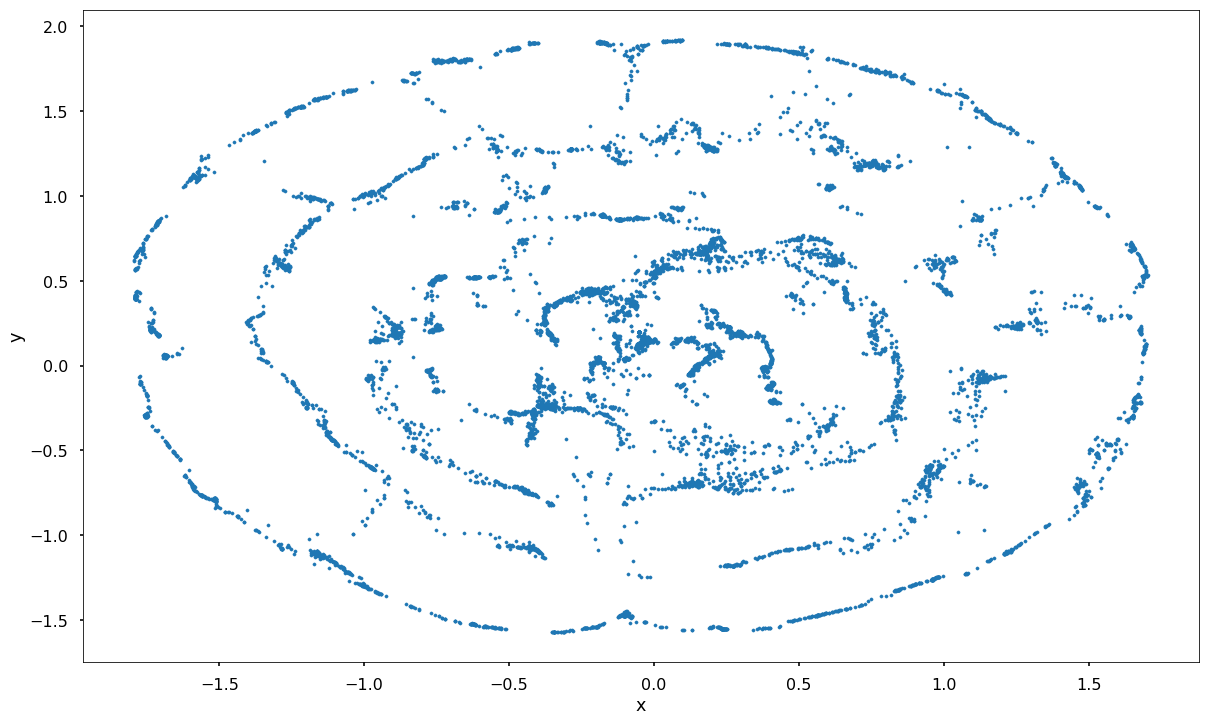

In [40]:
points.plot.scatter("x", "y", s=10, figsize=(20, 12))

In [41]:
ramayana2vec.most_similar("Rama")

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
2018-06-13 11:32:17,362 : INFO : precomputing L2-norms of word weight vectors


[('occupies', 0.47525739669799805),
 ('Fears', 0.4622487425804138),
 ('pacifies', 0.45550546050071716),
 ('De', 0.45201197266578674),
 ('Shat', 0.4504045844078064),
 ('Lak', 0.4482352137565613),
 ('Recollecting', 0.4425639510154724),
 ('Sarama', 0.44195541739463806),
 ('Shri', 0.4397425949573517),
 ('illusory', 0.4385651648044586)]

In [42]:
ramayana2vec.most_similar("Sita")

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('Princess', 0.4795403480529785),
 ('princess', 0.47040629386901855),
 ('Maithili', 0.4614635705947876),
 ('Videha', 0.4443039000034332),
 ('blameless', 0.429771363735199),
 ('Assistance', 0.4257064759731293),
 ('Jatayu', 0.42254748940467834),
 ('description', 0.4180765151977539),
 ('breaks', 0.4130616784095764),
 ('Vaidehi', 0.4119434356689453)]

In [43]:
ramayana2vec.most_similar("Ravana")

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('Kumbhakarna', 0.5657420754432678),
 ('Meghanada', 0.5108330249786377),
 ('Dashagriva', 0.48514994978904724),
 ('Titans', 0.4683111608028412),
 ('Lanka', 0.46707653999328613),
 ('resumes', 0.46599385142326355),
 ('Khara', 0.45328447222709656),
 ('Titan', 0.4418676495552063),
 ('Jatayu', 0.4415109157562256),
 ('Oana', 0.43874526023864746)]

In [44]:
def nearest_similarity_cosmul(start1, end1, end2):
    similarities = ramayana2vec.most_similar_cosmul(
        positive=[end2, start1],
        negative=[end1]
    )
    start2 = similarities[0][0]
    print("{start1} is related to {end1}, as {start2} is related to {end2}".format(**locals()))
    return start2

In [46]:
nearest_similarity_cosmul("Rama", "Sita", "Bali")
print('\n')
nearest_similarity_cosmul("Rama", "Hanuman", "faith")
print('\n')
nearest_similarity_cosmul("Rama", "Lakshmana", "Ravana")

Rama is related to Sita, as Dundubhi is related to Bali


Rama is related to Hanuman, as undeviating is related to faith


Rama is related to Lakshmana, as Meghanada is related to Ravana


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `most_similar_cosmul` (Method will be removed in 4.0.0, use self.wv.most_similar_cosmul() instead).
  after removing the cwd from sys.path.


'Meghanada'

#### 1
In the literature, Rama is husband to Sita. We would expect the model to indicate that 'Bali' is related in the same way to 'Tara', his wife. However, the model shows 'Dundubhi' is similar to Bali, which is an error. (In the literature Dundubhi was a demon who lived in a mountainous region.)

#### 2
Hanuman is a friend and devotee of Lord Rama. Lord Hanuman is a god incarnate in the avatar of a monkey and possesses great strength and an army of followers. In the epic, Hanuman's loyalty, faith and devotion to Rama is tested on many occations. 

The model shows very good association between 'undeviating' and 'faith' and is similar to Hanuman's relationship with Rama.

#### 3
Rama and Lakshmana are brothers. The model finds similarity between 'Ravana' and 'Meghanada' on the same lines. In the epic, although Ravana has brothers, Meghanada is a demon in the kingdom of Ravana. 

(This illustration is inspired by Yuriy Guts' post.)